In [1]:
import pandas as pd
import numpy as np

In [22]:
movies_df = pd.read_csv("movies.csv")

In [23]:
ratings_df = pd.read_csv("ratings.csv")

In [24]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [25]:
merge_df = movies_df.merge(ratings_df, on = "movieId")

In [26]:
merge_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [27]:
merge_df.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

In [16]:
merge_df.isna().sum() #No empty columns

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [29]:
rating_df = merge_df.groupby("title")["rating"].count()

In [33]:
type(rating_df)

pandas.core.series.Series

In [35]:
rdf = rating_df.to_frame()

In [36]:
rdf

,rating
title,
'71 (2014),1
'Hellboy': The Seeds of Creation (2004),1
'Round Midnight (1986),2
'Salem's Lot (2004),1
'Til There Was You (1997),2
...,...
eXistenZ (1999),22
xXx (2002),24
xXx: State of the Union (2005),5


In [38]:
merge_df = merge_df.merge(rdf, on = "title")

In [45]:
merge_df.rename(columns = {"rating_y": "rating_count"}, inplace = True)

In [46]:
merge_df.rename(columns = {"rating_x": "rating"}, inplace = True)

In [49]:
merge_df["rating_count"].describe()

count    100836.000000
mean         58.758777
std          61.965384
min           1.000000
25%          13.000000
50%          39.000000
75%          84.000000
max         329.000000
Name: rating_count, dtype: float64

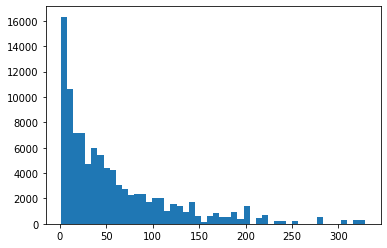

In [54]:
import matplotlib.pyplot as plt
x = merge_df["rating_count"]
plt.hist(x, bins = 50)
plt.show()

In [57]:
rating_threshold = 40 #Contains outlier, so taking the median
merge_df = merge_df[merge_df["rating_count"] > 40]

In [58]:
merge_df

,movieId,title,genres,userId,rating,timestamp,rating_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,215
...,...,...,...,...,...,...,...
98929,134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,567,2.0,1525284843,43
98930,134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,586,5.0,1529903054,43
98931,134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,596,4.5,1535709490,43
98932,134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,601,5.0,1521397599,43


In [60]:
#Pivot table
movie_features = merge_df.pivot_table(index = "title", columns = "userId", values = "rating").fillna(0)

In [61]:
movie_features.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
from scipy.sparse import csr_matrix
movie_features_matrix = csr_matrix(movie_features.values)

In [63]:
movie_features_matrix

<616x608 sparse matrix of type '<class 'numpy.float64'>'
	with 48748 stored elements in Compressed Sparse Row format>

In [64]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric = "cosine", algorithm = "brute")

In [65]:
knn.fit(movie_features_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [74]:
random_movie_index = np.random.choice(movie_features.shape[0])

In [75]:
random_movie_index

149

In [76]:
distances, indices = knn.kneighbors(movie_features.iloc[random_movie_index,:].values.reshape(1, -1), n_neighbors = 6)

In [77]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features.index[random_movie_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Crow, The (1994):

1: Batman (1989), with distance of 0.48159505435745986:
2: Mortal Kombat (1995), with distance of 0.5182862655644376:
3: Demolition Man (1993), with distance of 0.5719543247309082:
4: Interview with the Vampire: The Vampire Chronicles (1994), with distance of 0.5750674207045795:
5: Judge Dredd (1995), with distance of 0.5802161724932346:
